In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv('medical_examination.csv')


In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df = pd.read_csv('medical_examination.csv', index_col=0)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


agregar columna de sobrepeso:

In [ ]:
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0).astype(int)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalice los datos haciendo que 0 sea siempre bueno y 1 siempre malo. Si el valor de 'cholestorol' o 'gluc' es 1,

haga que el valor sea 0. Si el valor es mayor que 1, haga que el valor sea 1.

In [ ]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


 Dibujar una trama categórica



In [ ]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

Agrupe y reformatee los datos para dividirlos por "cardio". Muestre los recuentos de cada característica. Deberá cambiar el nombre

de una de las columnas para que el gráfico de cat funcione correctamente.

In [ ]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
df_cat = df_cat.rename(columns={0: 'total'})

 Dibuje el diagrama de gato con 'sns.catplot()'

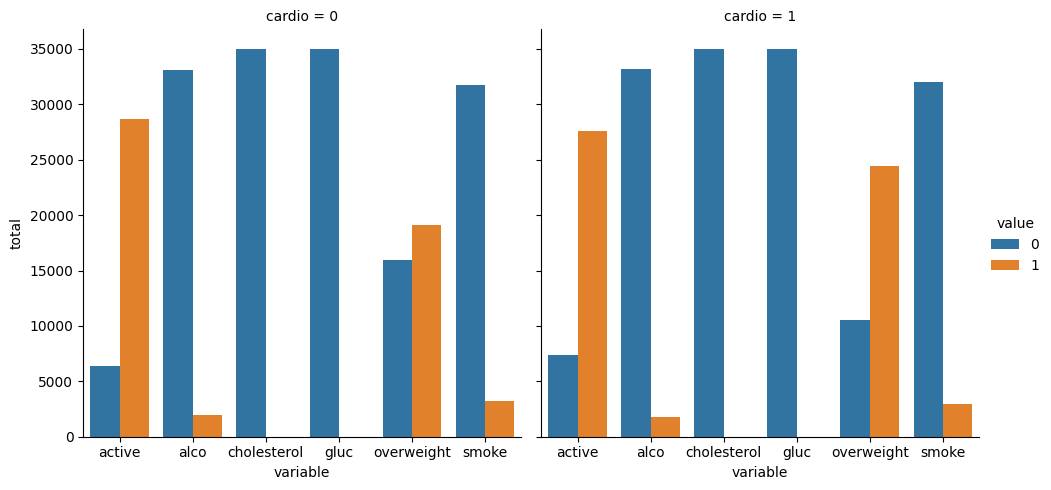

In [ ]:
graph = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')
fig = graph.fig

No modifique las siguientes dos líneas

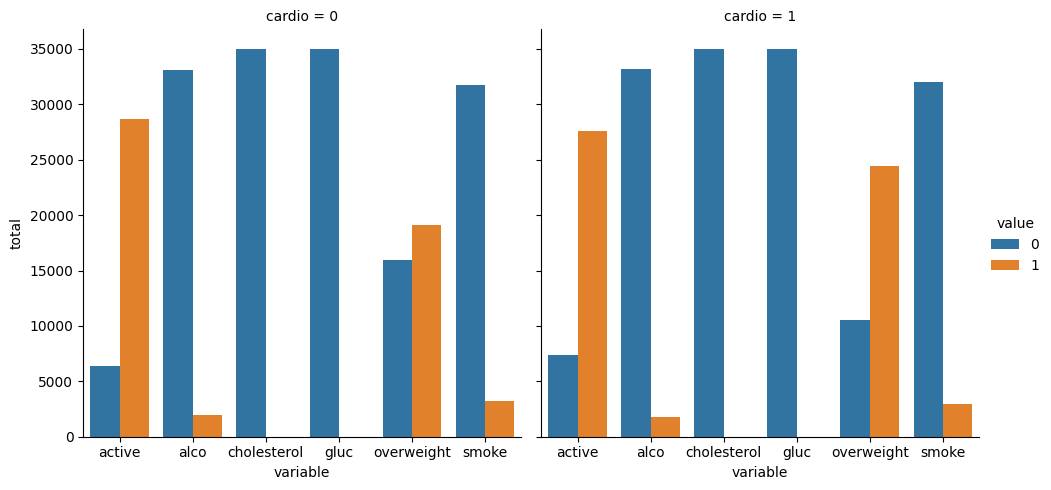

In [ ]:
fig.savefig('catplot.png')
fig

 Dibujar mapa de calor

In [ ]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
              (df['weight'] >= df['weight'].quantile(0.025)) &
              (df['weight'] <= df['weight'].quantile(0.975))
              ]



Calcular la matriz de correlación

In [ ]:
corr = df_heat.corr()

Generar una máscara para el triángulo superior:

In [ ]:
mascara = np.triu(np.ones_like(corr, dtype=bool))

Configurar la figura de matplotlib

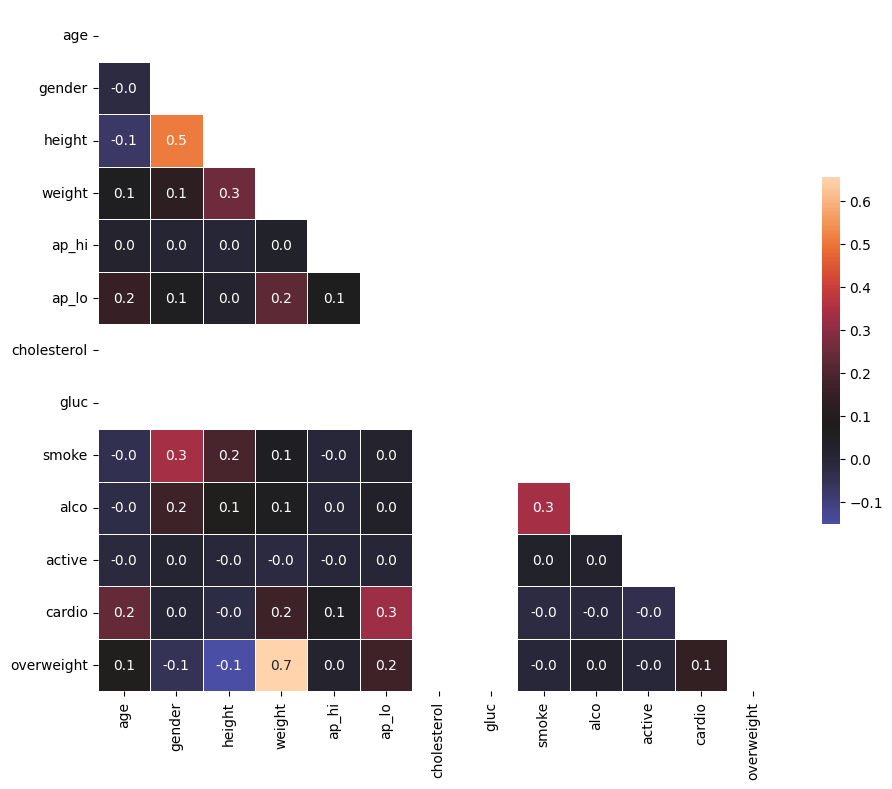

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))

mapa_calor = sns.heatmap(corr, mask=mascara, annot=True, fmt='.1f', center=0.08, square=True, linewidths=.5, cbar_kws={'shrink': 0.5})

fig = mapa_calor.figure


guardar el mapa de calor en un archivo png:

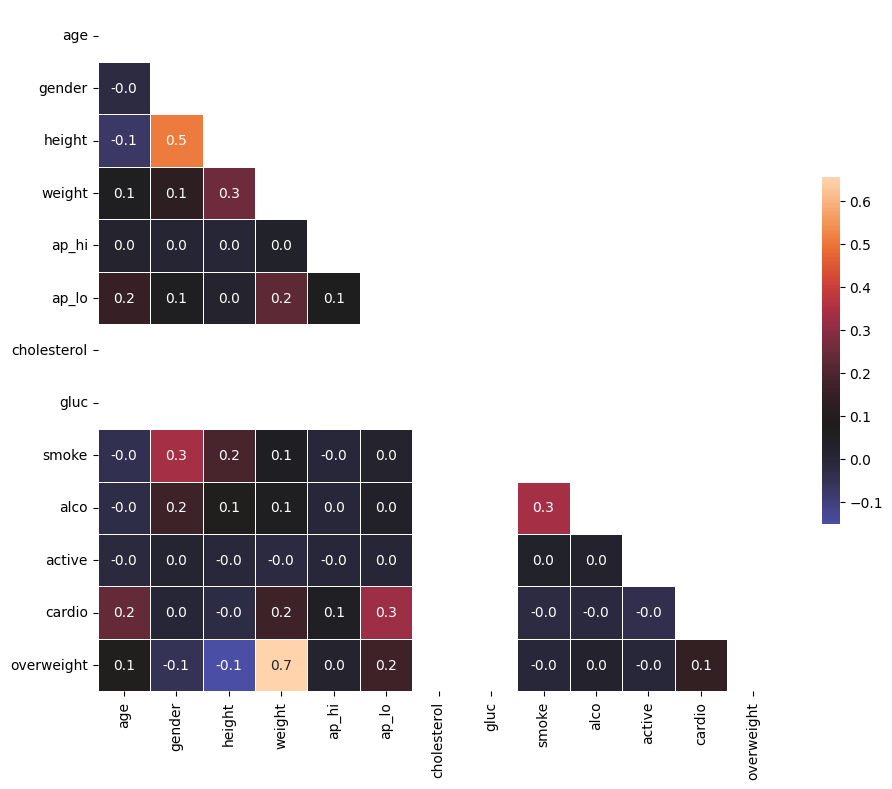

In [ ]:
fig.savefig('heatmap.png')
fig






Las pruebas unitarias se escriben para usted en test_module.py.

el caso de prueba